### Check Version of the Relevant Libraries

# Overfitting the test set

- Import `breast_cancer` dataset from Scikitlearn
- Scale the feature set
- Split data into first trainval and test, then split trainval into validation and train datasets
- Fit train dataset for `k=5` neighbors
- print the score on validation and test datasets

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X, y = cancer.data, cancer.target

In [13]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
X.shape

(569, 30)

In [7]:
import pandas as pd
cancerdf = pd.DataFrame(X, columns=cancer.feature_names)

In [8]:
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
cancerdf.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [12]:
cancerdf.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
feature->Age, Edu, Ethcity,gneder

In [14]:
from sklearn.preprocessing import scale

In [16]:
X_scaled = scale(X)

In [17]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [18]:
X_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled, y)

In [21]:
X_trainval.shape

(426, 30)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn5 = KNeighborsClassifier(n_neighbors=15)

In [46]:
knn5.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [47]:
knn5.score(X_val, y_val)

0.9532710280373832

In [48]:
knn5.score(X_test, y_test)

0.958041958041958

- Create a loop and fit your train dataset and test your validation dataset for `k=1,15,2`.
- Print the best validation score out of three neighbors and determine the `k` value with the highest score, $best_n$
- Retrain your model with trainvalidation dataset for $k=best_n$
- Print the score for test dataset for the latest trained model

In [31]:
import numpy as np

In [32]:
neighbors = np.arange(1,15,2)

In [49]:
neighbors

array([ 1,  3,  5,  7,  9, 11, 13])

In [33]:
valscore = []

In [35]:
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    scoreval = knn.score(X_val, y_val)
    valscore.append(scoreval)

In [50]:
valscore

[0.9252336448598131,
 0.9345794392523364,
 0.9626168224299065,
 0.9532710280373832,
 0.9439252336448598,
 0.9532710280373832,
 0.9532710280373832]

In [36]:
print(f"maximum score is {np.max(valscore)}")

maximum score is 0.9626168224299065


In [37]:
indmax = np.argmax(valscore)
print(f"index of the maximum score is {indmax}")

index of the maximum score is 2


In [39]:
k_best = neighbors[indmax]
print(f"Ther best k value is {k_best}")

Ther best k value is 5


In [41]:
knnbest = KNeighborsClassifier(n_neighbors = k_best)

In [43]:
knnbest.fit(X_trainval, y_trainval)

KNeighborsClassifier()

In [44]:
knnbest.score(X_test, y_test)

0.958041958041958

# Cross validation

- Import `cross_val_score` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1, 15, 2`, compute cross validation scores for trainvalidation dataset with kfold=10.
- Print the best validation score out of three neighbors and determine the `k` value with the highest score, $best_n$
- Retrain your model with trainvalidation dataset for $k=best_n$
- Print the score for test dataset for the latest trained model

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train2,X_test2, y_train2, y_test2 = train_test_split(X_scaled, y) 

In [59]:
cross_val_score(KNeighborsClassifier(), X_train2, y_train2, cv=10 )

array([0.97674419, 1.        , 1.        , 0.95348837, 0.93023256,
       0.95348837, 0.95238095, 1.        , 0.97619048, 0.95238095])

In [60]:
neighbors = np.arange(1,15,2)
cross_avg_score = []

In [61]:
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train2, y_train2, cv=10 )
    print(f"for {i} neighbors, the ten scores are:")
    print(scores)
    print("==============================")
    cross_avg_score.append(np.mean(scores))

for 1 neighbors, the ten scores are:
[0.97674419 1.         1.         0.95348837 0.90697674 0.95348837
 0.95238095 0.92857143 0.95238095 0.9047619 ]
for 3 neighbors, the ten scores are:
[1.         1.         1.         0.95348837 0.93023256 0.95348837
 0.95238095 1.         0.97619048 0.95238095]
for 5 neighbors, the ten scores are:
[0.97674419 1.         1.         0.95348837 0.93023256 0.95348837
 0.95238095 1.         0.97619048 0.95238095]
for 7 neighbors, the ten scores are:
[0.95348837 0.97674419 1.         0.95348837 0.93023256 0.97674419
 0.95238095 1.         0.95238095 0.95238095]
for 9 neighbors, the ten scores are:
[0.97674419 1.         1.         0.95348837 0.93023256 0.95348837
 0.95238095 1.         0.92857143 0.95238095]
for 11 neighbors, the ten scores are:
[0.97674419 0.97674419 1.         0.95348837 0.93023256 0.95348837
 0.95238095 1.         0.95238095 0.95238095]
for 13 neighbors, the ten scores are:
[0.97674419 0.97674419 1.         0.93023256 0.93023256 0.930

In [62]:
idmax2 = np.argmax(cross_avg_score)

In [63]:
k_best2 = neighbors[idmax2]
print(f"The best k value after cross-validation is {k_best2}")

The best k value after cross-validation is 3


In [64]:
knn_best2 = KNeighborsClassifier(n_neighbors = k_best2)

In [65]:
knn_best2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=3)

In [66]:
knn_best2.score(X_test2, y_test2)

0.965034965034965

# GridSearchCV

- Import `GridSearchCV` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1 to 30`, compute `GridSearchCV` for train dataset with kfold=10.
- Print the best cross validation score 
- Priont the best parameter
- Print the test score

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
from sklearn.model_selection import train_test_split

In [73]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled,y)

In [74]:
knn = KNeighborsClassifier()

In [75]:
params = {"n_neighbors":np.arange(1,30,2)}

In [80]:
mygrid = GridSearchCV(knn, param_grid = params, cv=10, return_train_score=True)

In [81]:
mygrid

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [82]:
mygrid.fit(X_train3, y_train3)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [83]:
mygrid.best_params_

{'n_neighbors': 5}

In [84]:
mygrid.best_estimator_

KNeighborsClassifier()

In [85]:
mygrid.cv_results_

{'mean_fit_time': array([0.00062456, 0.00103309, 0.00078321, 0.00050342, 0.00075519,
        0.00051   , 0.00086632, 0.00054059, 0.00059922, 0.00061238,
        0.00057914, 0.00100124, 0.00072131, 0.00045657, 0.00071492]),
 'std_fit_time': array([0.00038389, 0.00050664, 0.00017151, 0.00021937, 0.0004395 ,
        0.00020736, 0.00020229, 0.00017375, 0.00020296, 0.00013006,
        0.00027317, 0.00073724, 0.00019902, 0.00020947, 0.00013181]),
 'mean_score_time': array([0.29793417, 0.31456811, 0.31634233, 0.30750444, 0.31121311,
        0.30177505, 0.31167438, 0.31325226, 0.31491733, 0.32649   ,
        0.30213377, 0.31784198, 0.32094822, 0.30172229, 0.30369508]),
 'std_score_time': array([0.02561879, 0.01030483, 0.02485688, 0.01117642, 0.00945691,
        0.01051297, 0.01483672, 0.01260909, 0.00860946, 0.03795697,
        0.01682651, 0.01060149, 0.01412507, 0.01448773, 0.01366042]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
         

In [87]:
results = pd.DataFrame(mygrid.cv_results_)

In [88]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

<Axes: xlabel='param_n_neighbors'>

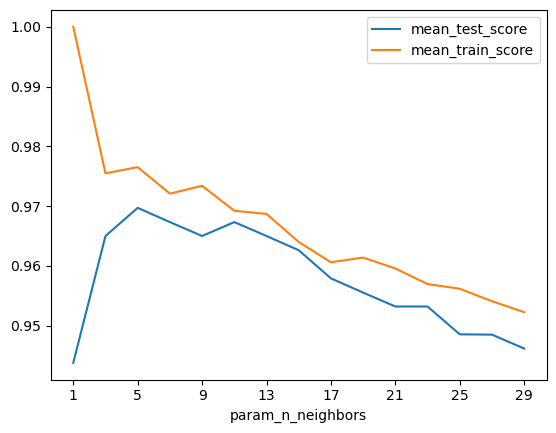

In [93]:
import matplotlib.pyplot as plt
results.plot('param_n_neighbors','mean_test_score')
results.plot('param_n_neighbors','mean_train_score', ax = plt.gca())

In [ ]:
results-->mean of the train scores for each k value, k goes from 1 to 29
results-->mean of the test scores for each k value, k goes from 1 to 29

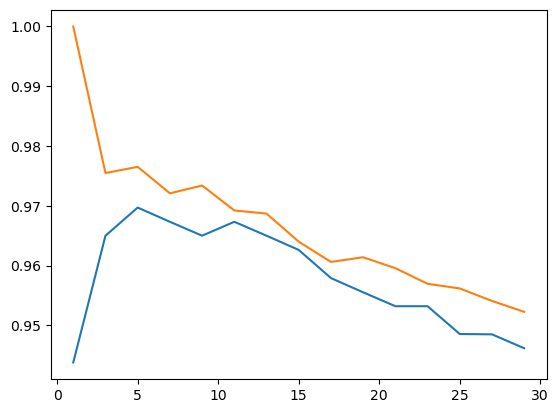

In [94]:
plt.plot(results.param_n_neighbors, results.mean_test_score)
plt.plot(results.param_n_neighbors, results.mean_train_score)

In [ ]:
train_test_split(X,y, random_state=0)